In [1]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [2]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");""";

In [3]:
time = 3000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
u0 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [5]:
"""for elem in dict
    println(elem);
end;"""
;

In [6]:
param[11] =  -1.55

-1.55

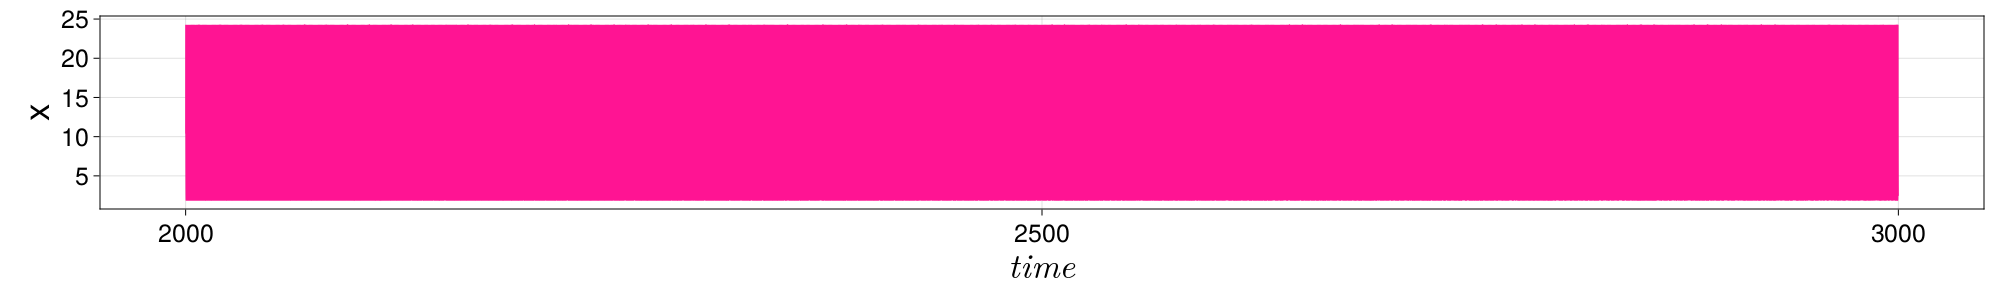

CairoMakie.Screen{IMAGE}


In [12]:
ds= CoupledODEs(TM6_glial_ECM, u0, param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);
plot_timesereis(trange, tr[:, 1], 2000000, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

In [13]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);

In [14]:
fp

6-dimensional StateSpaceSet{Float64} with 5 points
 25.1301   0.22419   0.918023  1.0635e-6    0.417699     2.77861e-8
  1.08933  0.919497  0.53581   0.470099     1.08225e-70  1.62284e-107
 25.9288   0.218379  0.920261  9.46808e-7   0.440686     0.194124
  9.41971  0.464158  0.817037  0.000129123  1.42316e-46  9.66963e-145
  2.43247  0.821549  0.595315  0.135885     8.3778e-67   1.65849e-119

In [17]:
eigs[4]

6-element Vector{ComplexF64}:
  -3.474916635422713 + 0.0im
 -1.1235548513030102 - 21.225528399118758im
 -1.1235548513030102 + 21.225528399118758im
 -0.5555555555557669 + 0.0im
               -0.01 + 0.0im
              -0.001 + 0.0im

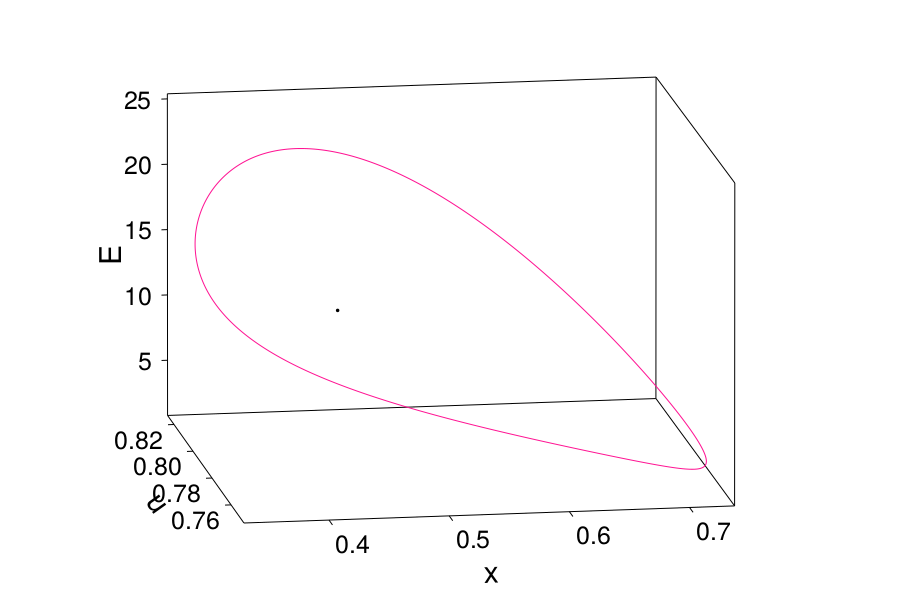

In [18]:
idx, idy, idz = 2, 3, 1
data = [tr[:, idx], tr[:, idy], tr[:, idz]]
plot_3d_fps(data, [fp[4], idx, idy, idz], 2000000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "u", zl = "E", color = :deeppink);